# Grocery Store Item - Image Classification

This was a part of a tutorial that i took on [Source: sdinu94](https://github.com/sdinu94/ImageClassification/blob/master/01%20Data%20Exploration/Data%20Exploration.ipynb). The objective is to build a powerful image classifier to identfy the object in the dataset and accurately predict the image classification. 

In this notebook, we utilize keras to build a convolutional neural network and discuss several ways to define the hyperparameters and learning rates. 

The dataset used in this notebook can be found here: [dataset](https://s3.us-east-2.amazonaws.com/ids594ml/Archive.zip) NOTE: BY CLICKING THIS LINK THE ZIP FILE WILL DOWNLOAD...


Lets get started!

## Imports

In [1]:
import numpy as np
import pandas as pd

import os


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Files

In [2]:
train = pd.read_csv('trainml.csv')
test = pd.read_csv('test.csv')

# set seed for reproducibility
np.random.seed(7)

# data load stats
print("The train dataset has {} images".format(train.shape[0]))
print("The test dataset has {} images".format(test.shape[0]))
print("The train data has {} unique labels".format(train.label.nunique()))
print("Unique Labels: ", list(train.label.unique()))

The train dataset has 2250 images
The test dataset has 965 images
The train data has 25 unique labels
Unique Labels:  ['rice', 'candy', 'jam', 'coffee', 'vinegar', 'chocolate', 'sugar', 'water', 'juice', 'milk', 'soda', 'nuts', 'chips', 'spices', 'cereal', 'beans', 'cake', 'honey', 'flour', 'pasta', 'tomatosauce', 'tea', 'corn', 'oil', 'fish']


## Data Analysis

use a seaborn plot to show the distribution for the labels

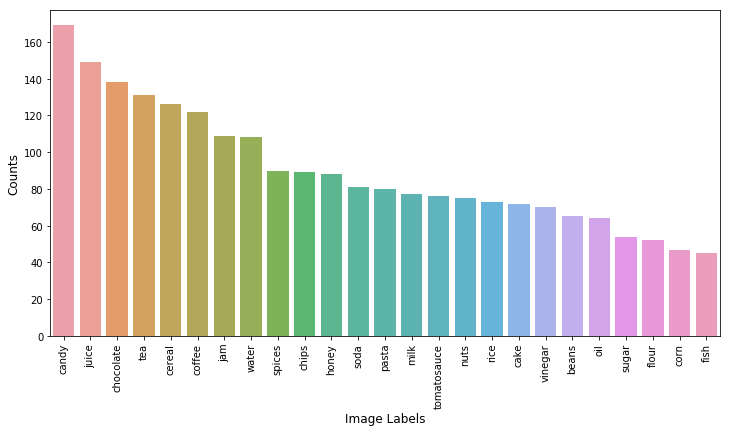

count     25.000000
mean      90.000000
std       33.176297
min       45.000000
25%       70.000000
50%       80.000000
75%      109.000000
max      169.000000
Name: label, dtype: float64

In [3]:
label_counts = train.label.value_counts()

# plot label_counts
plt.figure(figsize = (12, 6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()
label_counts.describe()

## Image Analysis

In [4]:
# set path to read train and test images
TRAIN_PATH = './train_img/'
TEST_PATH = './test_img/'

Next we will use `cv2` [OpenCV](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) to read the images. Using `cv2` we can also display and save he images. in roder to process  the image in `scikit-learn` we will first need to transform the image into an array.. specifically a `np.array`.

In [5]:
import cv2 

# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converts image from BRR to RGB
    img = cv2.resize(img, (128, 128)) # resize image to (128,128)... or also (256, 256)
    return img

Read images and store it as an array. To enahce this process we will use the progress bar `tqdm` that instantly make our loops show a smart progress meter. All we have ot do is wrap our data load with tqdm(iterable), and we are done! EZ PEEZE

In [6]:
from tqdm import tqdm

train_data = []
test_data = []
train_labels = train.label.values

for img in tqdm(train.image_id.values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))
    
train_array = np.asarray(train_data)

for img in tqdm(test.image_id.values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))
    
test_array = np.asarray(test_data)

train_array = train_array.reshape(train_array.shape[0], 128, 128, 3).astype('float32')
test_array = test_array.reshape(test_array.shape[0], 128, 128, 3).astype('float32')

train_array /= 255
test_array /= 255
print(train_array.shape)
print(test_array.shape)

100%|██████████| 965/965 [00:08<00:00, 118.46it/s]


(2250, 128, 128, 3)
(965, 128, 128, 3)


In [7]:
# target variable - encoding numeric value
label_list = train.label.tolist()
Y_train = {k:v for v, k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

label_list = test.label.tolist()
Y_test = {k:v for v, k in enumerate(set(label_list))}
y_test = [Y_test[k] for k in label_list]

In [8]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)

print the first 4 images in train and test

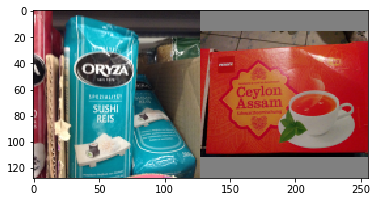

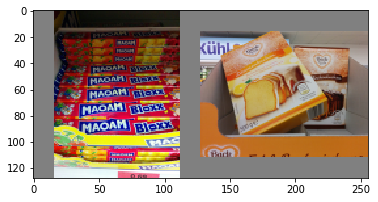

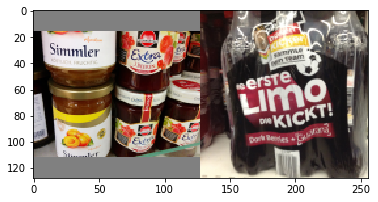

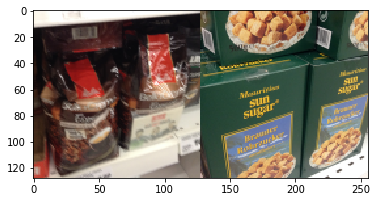

In [9]:
for img_index in range(4):
    show_images(img_index)

## Model Development

Next we will introduce `keras` to the mix and use the `to_categorical` module that conversts a class vector (integers) to binary class matrix. We will first have ot define the total number of classes of 26 as indicated above.

In [10]:
import keras

num_classes = 26
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

/home/redne/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Random Forest

https://github.com/sdinu94/ImageClassification/blob/master/02%20Random%20Forest/RF.ipynb

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

x_train = np.reshape(train_array, (train_array.shape[0], -1))
x_test = np.reshape(test_array, (test_array.shape[0], -1))
print(x_train.shape)
print(x_test.shape)
clf = RandomForestClassifier(n_estimators=50, max_depth=None,min_samples_split=20, random_state=1).fit(x_train,y_train)
Results=clf.predict(x_test)

# Classification report for RF 
print (classification_report(Results,y_test))

(2250, 49152)
(965, 49152)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
          2       0.03      1.00      0.05         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         17       

/home/redne/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/redne/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


#### cross validation

In [12]:
from sklearn import model_selection
clf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=20,
                            random_state=1).fit(x_train, y_train)

result = model_selection.cross_val_score(clf, x_train, y_train, cv=5)
print(result.mean())

0.0017777777777777779


## CNN Gridsearch

Next we will introduce ___Convolutional Neural Network___ or `convent` for short which is a special kind of neural network which contains at least one convultionanal layer. A typical convnet strucutre takes an image, passes it through a series of convolutional layers, nonlinear activation layers, pooling and fully connected layers to output the classification labes. 

[Source sdinu94](https://github.com/sdinu94/ImageClassification/blob/master/03%20CNN/01%20Grid%20Search/CNN%20Gridsearch.ipynb)

In [13]:
# target variable - encoding numeric value
label_list = train.label.tolist()
Y_train = {k:v for v, k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

label_list = test.label.tolist()
Y_test = {k:v for v, k in enumerate(set(label_list))}
y_test = [Y_test[k] for k in label_list]

import keras
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define CNN Model

Next we will devepe the CNN model and adjust the learning rate schedule. to adjust the learning rate we will utilize `keras optimizer SGD` the stochastic gradient descent algorithm to compare the performance of different learning rate schedules. 

In [14]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:
def CNN_optimizer(optimizer='SGD'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', kernel_initializer='uniform',
                 input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [16]:
# create model
#epochs = 10
model = KerasClassifier(CNN_optimizer, epochs=2, verbose=0)

### Grid Search  - Hyperparameter Tuning
Next we define the grid search.. we do this instead of manually tuning the cnn hyperparameters...bc its so impratical...we dont have time for it. Instead, thanks to our good friend `scikit-learn` we can leverage `model_selection` module `GridSearchCV` which searches all parameter combinations for given values. 

In [17]:
# define the grid search parameters - optimization algorthms 
from sklearn.model_selection import GridSearchCV
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(model, param_grid=param_grid, n_jobs=1, scoring='neg_log_loss')
grid_result = grid.fit(train_array, y_train)


#### Model Evaluation

In [18]:
# summarize reults
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2.985243 using {'optimizer': 'RMSprop'}
-3.175716 (0.000743) with: {'optimizer': 'SGD'}
-2.985243 (0.058678) with: {'optimizer': 'RMSprop'}
-13.263275 (14.392829) with: {'optimizer': 'Adagrad'}
-3.137833 (0.010212) with: {'optimizer': 'Adadelta'}
-3.050447 (0.074512) with: {'optimizer': 'Adam'}
-3.071353 (0.030536) with: {'optimizer': 'Adamax'}
-3.071842 (0.023817) with: {'optimizer': 'Nadam'}


### Parameter Tuning - Epoch and Batchsizes

#### Define CNN Model

In [19]:
def cnn_epoch_batchsize():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', kernel_initializer='uniform',
                 input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adagrad',
              metrics=['accuracy'])
    
    return model

In [20]:
# create a model
model = KerasClassifier(cnn_epoch_batchsize, verbose=0)

In [21]:
# Define the grid search parameters - Epochs and Batch Size

batch_size = [64, 128 , 256]
#epochs = [5, 10, 15]
epochs = [1, 2]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, 
                    scoring='neg_log_loss')
grid_result = grid.fit(train_array, y_train)

In [22]:
# Summarize results - Epochs and Batch Size

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -3.187328 using {'batch_size': 64, 'epochs': 2}
-3.197910 (0.012463) with: {'batch_size': 64, 'epochs': 1}
-3.187328 (0.010604) with: {'batch_size': 64, 'epochs': 2}
-22.669033 (13.774583) with: {'batch_size': 128, 'epochs': 1}
-3.188001 (0.013107) with: {'batch_size': 128, 'epochs': 2}
-12.502009 (13.093274) with: {'batch_size': 256, 'epochs': 1}
-3.239927 (0.061212) with: {'batch_size': 256, 'epochs': 2}


## Best Model
https://github.com/sdinu94/ImageClassification/blob/master/03%20CNN/02%20Modeling/Best%20Model.ipynb

In [24]:
from keras.optimizers import Adagrad

# Best Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', kernel_initializer='zero',
                 input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_initializer='zero'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
optimizer = Adagrad(lr=0.005)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [25]:
history=model.fit(train_array, y_train, batch_size=128, epochs=5, validation_data=(test_array, y_test))

Train on 2250 samples, validate on 965 samples
Epoch 1/5
2250/2250 [==============================] - 31s 14ms/step - loss: 3.2153 - acc: 0.0640 - val_loss: 3.2117 - val_acc: 0.0756
Epoch 2/5
2250/2250 [==============================] - 29s 13ms/step - loss: 3.2109 - acc: 0.0751 - val_loss: 3.2085 - val_acc: 0.0756
Epoch 3/5
2250/2250 [==============================] - 29s 13ms/step - loss: 3.2083 - acc: 0.0751 - val_loss: 3.2062 - val_acc: 0.0756
Epoch 4/5
2250/2250 [==============================] - 29s 13ms/step - loss: 3.2062 - acc: 0.0751 - val_loss: 3.2042 - val_acc: 0.0756
Epoch 5/5
2250/2250 [==============================] - 29s 13ms/step - loss: 3.2045 - acc: 0.0751 - val_loss: 3.2026 - val_acc: 0.0756


Test loss:  3.2025518548303316
Test accuracy:  0.075647668409224


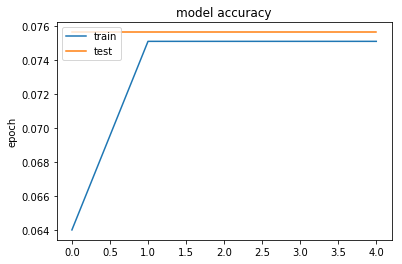

In [26]:
score = model.evaluate(test_array, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

# summarize history for accurach
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

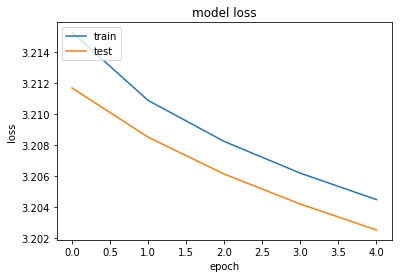

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Parameter tuning - Kernel Initializer

def CNN_kernelinit(init_mode='uniform'):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', kernel_initializer=init_mode,
                 input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer=init_mode))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adagrad(lr=0.005)
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [ ]:
# create model
model = KerasClassifier(CNN_kernelinit, epochs=5, batch_size=256, verbose=0)

In [ ]:
# Define the grid search parameters - Kernel Initializer
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 
             'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, 
                    scoring='neg_log_loss')
grid_result = grid.fit(train_array, y_train)

In [ ]:
# Summarize results - Kernel Initializer
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))